#Aplicación eigenfaces
Guido Salazar\
Laura Isabel Sánchez

https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC06_1.ipynb

# Importar Datos

Se fotografió a ocho compañeros, cada uno con cuatro poses diferentes, variando en las rotaciones de las caras. Estos datos son las fotos en la carpeta CSV/fotos

In [ ]:
from google.colab import files
uploaded = files.upload()

# Recorte de las imágenes
Las imágenes originales son recortadas a las dimensiones 1208x1208. Estas imágenes son almacenadas con un sistema RGB, esto quiere decir que cada pixel de la imagen almacena 3 valores. Estos 3 valores son cambiados a una escala de grises usando coeficientes de luminancia de ITU-R BT.601.

https://es.wikipedia.org/wiki/UIT-R_BT.601-7

Asimismo, las imágenes se recortan tomando como centro inferior el menton.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def rgb2hex(r,g,b):
    """
    Función para transformar un color de rgb a hexadecimal
    Entradas: RGB(r,g,b): numero de cantidad de red, green y blue
    Salidas: codigo hexadecimal del color rgb
    """
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

# Supongamos que img es una matriz de imagen RGB con forma (alto, ancho, 3)
# Aquí hay un ejemplo de cómo podrías convertir una imagen RGB a escala de grises
def rgb_to_grayscale(rgb_image):
    # Usamos los coeficientes de luminancia de ITU-R BT.601
    return np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])

def normalizar_imagenes(nombre, cantidad, extencion=".jpeg", recorte="default"):
  # Lista para almacenar las imágenes recortadas
  imagenes_recortadas = []
  deltax, deltay = None, None
  if recorte == "default":
    deltax = [-100, -100, -200, -100, -50, -100, -50, -50, 50, 100, 50, 50, 0, -100, 100, 0, 0, 0, 0, 0, 100, -150, 100, 100, 0, 0, 0, 0, 0, 0, 120, 0]
    deltay = [0, 0, 0, 0, -200, -200, -200, -200, -200, -200, -200, -200, 400, 400, 400, 400, 100, 100, 100, 100, -300, -300, -300, -300, -200, -200, -200, -200, -150, -150, -150, -150]
  else: deltax, deltay = recorte[0], recorte[1]
  i = 0
  for p in range(8):
    flag = False
    for j in range(16):
      if i == cantidad:
        flag = True
        break
      imagen = Image.open(f'{nombre}{i+1}{extencion}')

      # Obtener dimensiones de la imagen
      ancho, alto = imagen.size
      # Calcular las coordenadas del cuadrado en el centro
      lado = min(ancho, alto)
      centro_x = ancho // 2
      centro_y = alto // 2
      mitad_lado = lado // 5
      area_recorte = None
      if recorte=="default":
        area_recorte = (centro_x - mitad_lado + deltax[(p*4)+(j%4)], centro_y - mitad_lado + deltay[(p*4)+(j%4)], centro_x + mitad_lado + deltax[(p*4)+(j%4)], centro_y + mitad_lado + deltay[(p*4)+(j%4)])
      else:
        area_recorte = (centro_x - mitad_lado + deltax[i], centro_y - mitad_lado + deltay[i], centro_x + mitad_lado + deltax[i], centro_y + mitad_lado + deltay[i])
      # Aplicar el recorte y agregarlo a la lista
      imagen_recortada = imagen.crop(area_recorte)
      t = np.array(imagen_recortada)
      imagenes_recortadas.append(np.ndarray.flatten((rgb_to_grayscale(t))))
      i += 1
    if flag: break

  return imagenes_recortadas

In [ ]:
imagenes_recortadas = np.array(normalizar_imagenes("", 32*4)).T

# Conjunto de prueba

A partir de lo anterior tenemos un conjunto de prueba de 32 imágenes, no obstante este conjunto es reducido por lo que para ampliar la muestra se editaron las imágenes variando la iluminación y saturación de las originales. Obteniendo 128 imagenes

## Conjunto de individuos

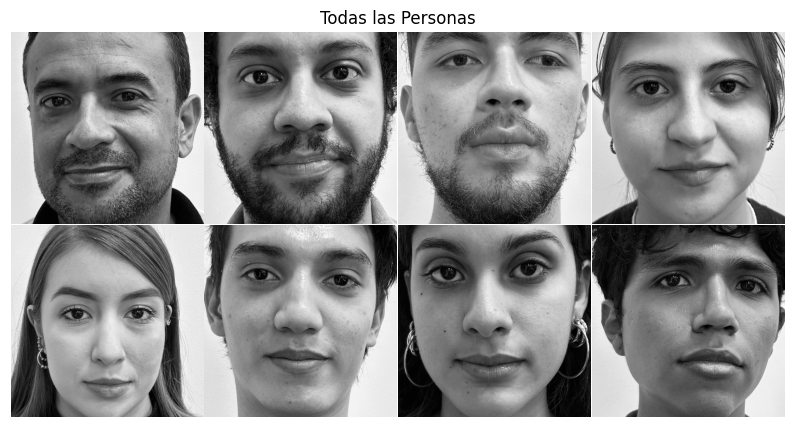

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [8, 8]
# plt.rcParams.update({'font.size': 18})

m,n = 1208, 1208

fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(2, 4, wspace=0, hspace=0)
plt.title("Todas las Personas")
plt.axis("off")
# Añadir cada imagen a la cuadrícula
index = 0
for i in range(2):
  for j in range(4):
    ax = fig.add_subplot(gs[i, j])
    img = ax.imshow(np.reshape(imagenes_recortadas[:,index+3], (n, m)))
    img.set_cmap('gray')
    ax.axis('off')  # Ocultar los ejes
    index += 16
# Mostrar la figura
plt.show()

## Conjunto de fotos iniciales

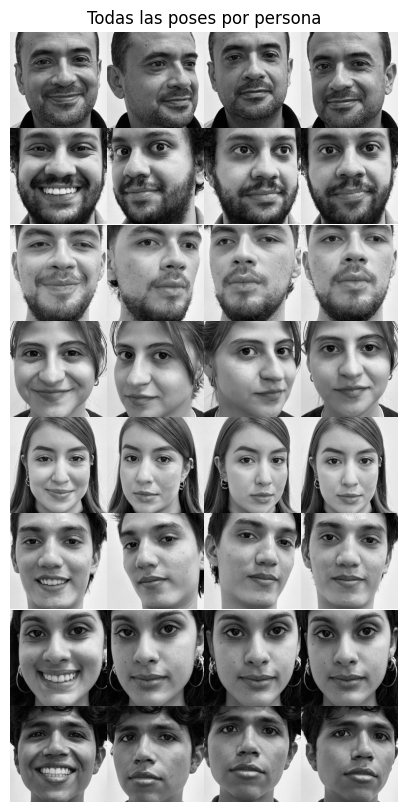

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [8, 8]
# plt.rcParams.update({'font.size': 18})

m,n = 1208, 1208

fig = plt.figure(figsize=(5, 10))
gs = fig.add_gridspec(8, 4, wspace=0, hspace=0)
plt.title("Todas las poses por persona")
plt.axis("off")
# Añadir cada imagen a la cuadrícula
index = 0
for i in range(8):
  for j in range(4):
    ax = fig.add_subplot(gs[i, j])
    img = ax.imshow(np.reshape(imagenes_recortadas[:,index+j], (n, m)))
    img.set_cmap('gray')
    ax.axis('off')  # Ocultar los ejes
  index += 16
# Mostrar la figura
plt.show()


## Conjunto de prueba expandido

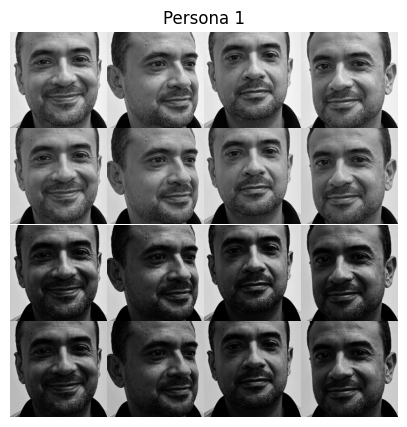

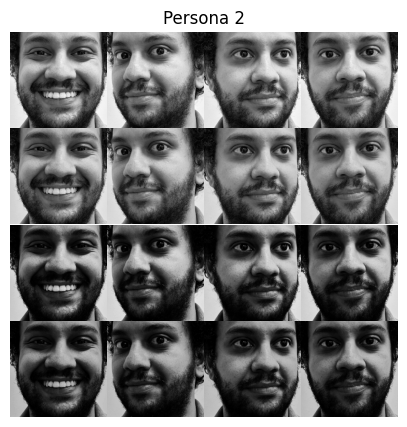

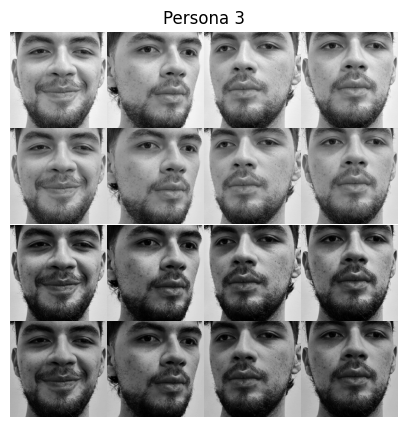

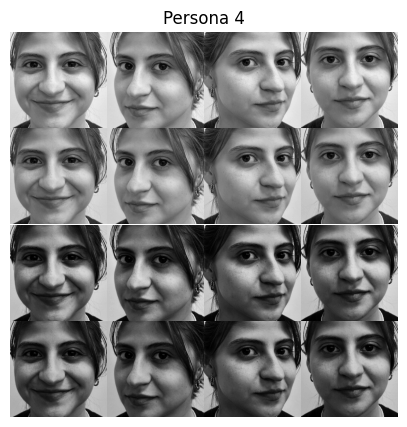

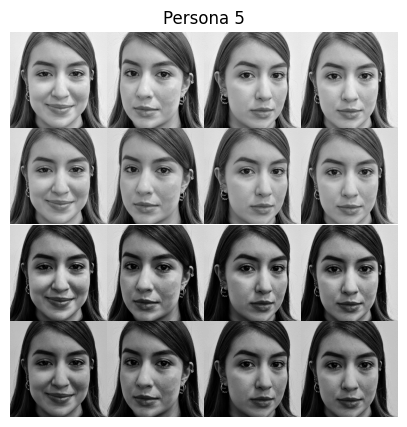

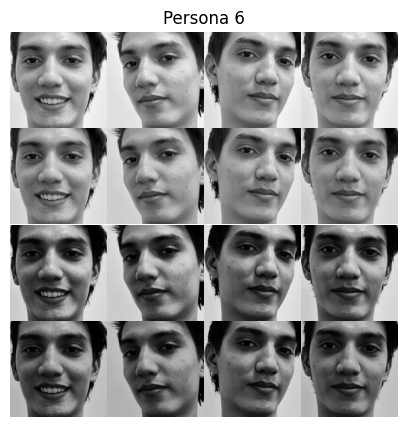

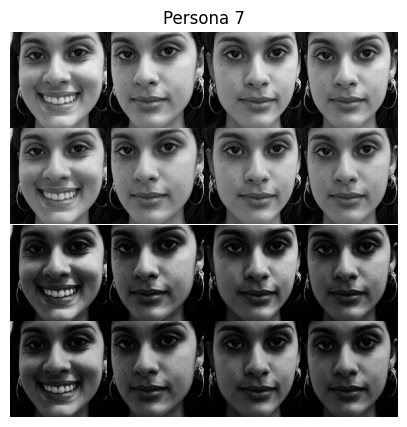

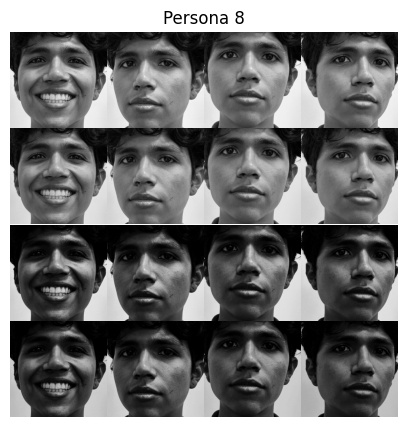

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [8, 8]
# plt.rcParams.update({'font.size': 18})

m,n = 1208, 1208

# Añadir cada imagen a la cuadrícula
for p in range(8):
  fig = plt.figure(figsize=(5, 5))
  plt.title(f"Persona {p+1}")
  plt.axis("off")
  gs = fig.add_gridspec(4, 4, wspace=0, hspace=0)
  for i in range(4):
    for j in range(4):
      ax = fig.add_subplot(gs[i, j])
      img = ax.imshow(np.reshape(imagenes_recortadas[:,(p*16)+(i*4)+j], (n, m)))
      img.set_cmap('gray')
      ax.axis('off')  # Ocultar los ejes
  # Mostrar la figura
  plt.show()


# SVD
$X = USV^T$\
\
Donde $X$ es una base de datos donde cada columna es un rostro humano.\
\
Al usar SVD se puede encontrar una nueva representación de los rostros, que se llamará el rostro propio o matriz U.
Para esto se realizó el entrenamiento del código con ocho personas y a partir de eso se revisó que tan bien se comportaba para reconstuir una imagen por fuera del conjunto de entrenamiento y reconocer un rostro del conjunto de datos.\
\
Cada imagen se convierte el un vector de 1028x1028, para construir la matriz $X$.Luego se encuentra la cara promedio y esta se resta a cada vector perteneciente a la matriz $X$.Se encuentra el SVD a esa nueva matriz sin la cara promedio.De esta manera, la combinación lineal de vectores de U o caras propias puede reconstruir la imagen de un rostro.\
\
Una persona que no esta en la muestra se puede ver en el espacio que construimos donde $U_r^Tx = \alpha$, sabiendo que $X \approx U_r\sum_r V^T_r$, $\alpha$ es la cantidad de cada una de las caras propias para construir esa persona. Luego $U_rU_r^Tx \approx x$. r en este caso será definido de acuerdo al número de vectores sufiencientes para representar un rostro. Es así como esta aplicación lográ comprimir imágenes.


## Matriz x sin rostro promedio

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

n, m = 1208, 1208

# We use all 8 people for the training set
trainingFaces = imagenes_recortadas
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T

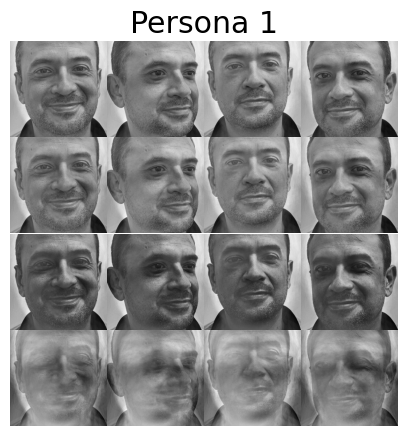

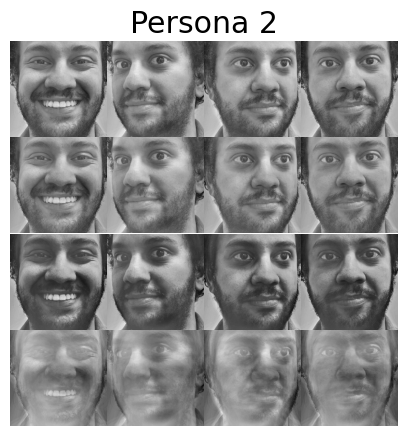

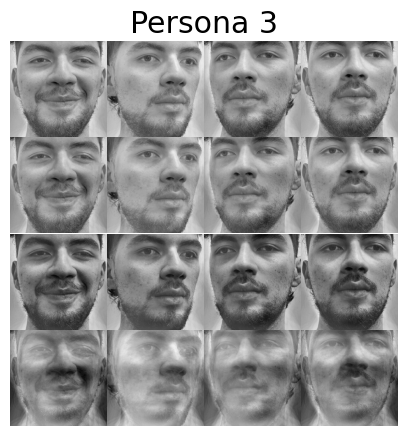

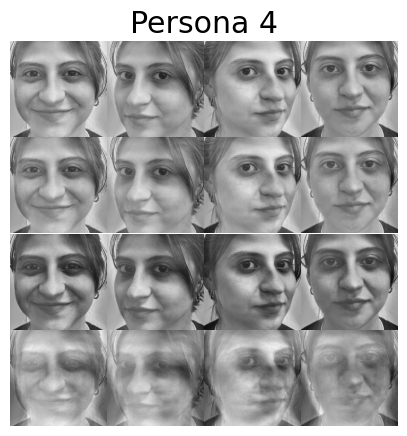

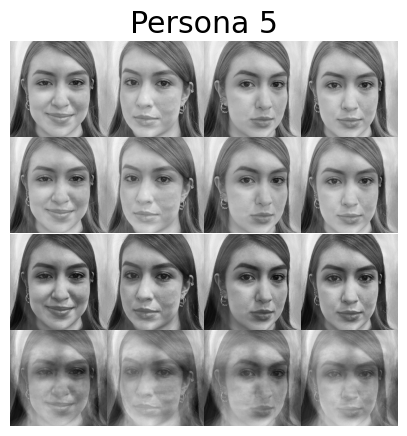

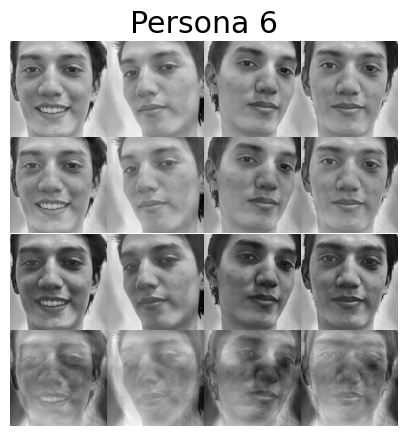

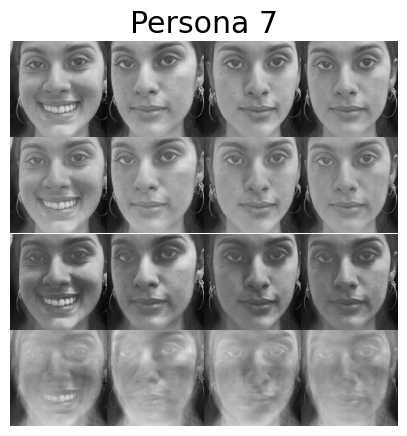

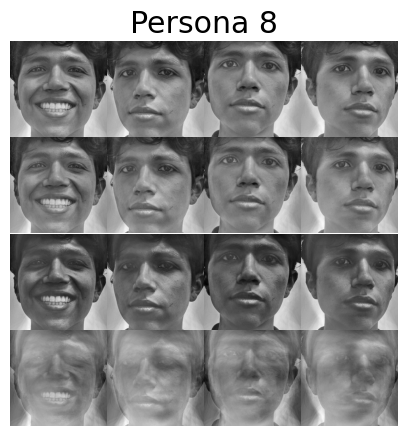

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [8, 8]
# plt.rcParams.update({'font.size': 18})

m,n = 1208, 1208

# Añadir cada imagen a la cuadrícula
for p in range(8):
  fig = plt.figure(figsize=(5, 5))
  plt.title(f"Persona {p+1}")
  plt.axis("off")
  gs = fig.add_gridspec(4, 4, wspace=0, hspace=0)
  for i in range(4):
    for j in range(4):
      ax = fig.add_subplot(gs[i, j])
      img = ax.imshow(np.reshape(X[:,(p*16)+(i*4)+j], (n, m)))
      img.set_cmap('gray')
      ax.axis('off')  # Ocultar los ejes
  # Mostrar la figura
  plt.show()


## Rostro promedio + SVD

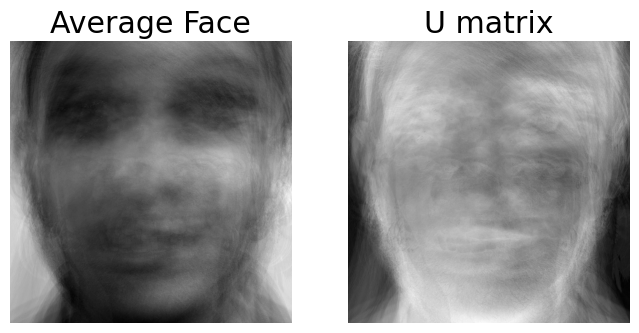

In [ ]:
U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)))
img_avg.set_cmap('gray')
plt.title("Average Face")
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)))
img_u1.set_cmap('gray')
plt.title("U matrix")
plt.axis('off')

plt.show()

## Caras propias

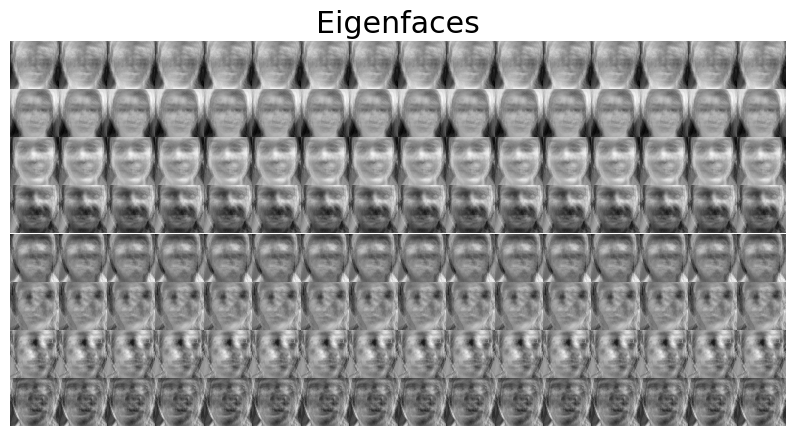

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(8, 16, wspace=0, hspace=0)
plt.title('Eigenfaces')
plt.axis('off')

index = -1
for i in range(8):
  for j in range(16):
    index += 1
    ax = fig.add_subplot(gs[i, j])
    img = ax.imshow(np.reshape(U[:,i], (n, m)))
    img.set_cmap('gray')
    ax.axis('off')  # Ocultar los ejes

plt.show()


# Reconstrucción

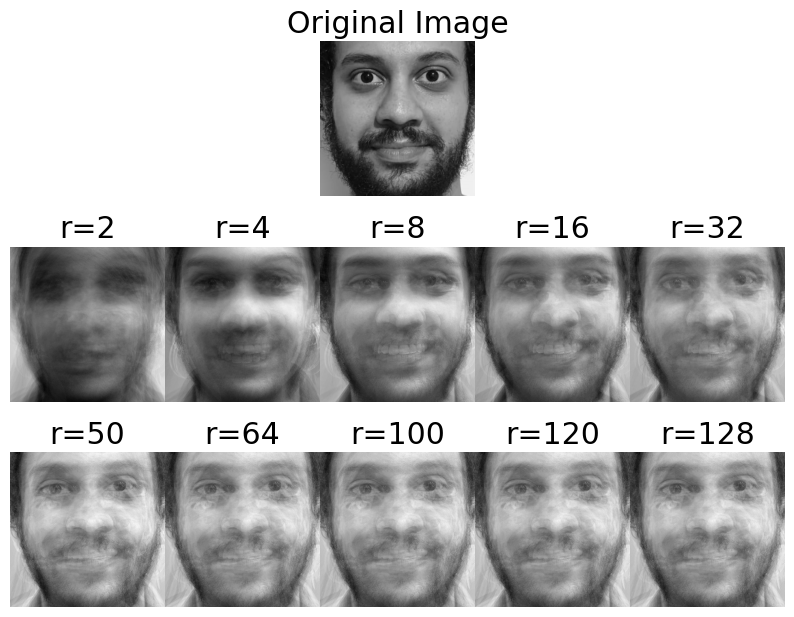

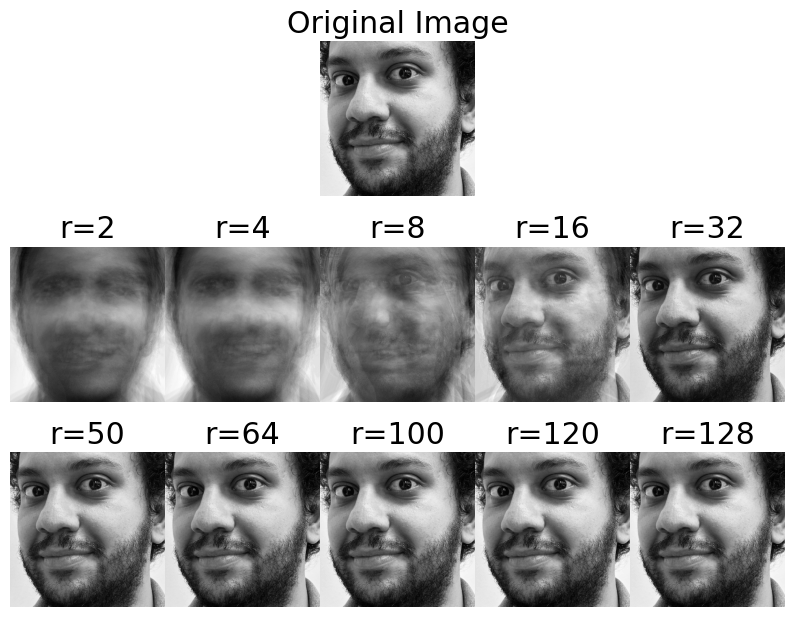

In [ ]:
## Now show eigenface reconstruction of image that was omitted from test set and on in the text set

recorte = [[-50, 0,], [100,100]]

textFaces = np.array(normalizar_imagenes("textimage", 1, extencion=".jpg", recorte=recorte)).T
for i in range(len(textFaces[0])+1):
  fig = plt.figure(figsize=(10, 8))
  gs = fig.add_gridspec(3, 5, wspace=0, hspace=0)

  testFace = textFaces[:,i] if i < len(textFaces[0]) else trainingFaces[:,17]

  ax = fig.add_subplot(gs[0, 2])
  img = ax.imshow(np.reshape(testFace, (n, m)))
  img.set_cmap('gray')
  ax.axis('off')  # Ocultar los ejes
  plt.title('Original Image')

  testFaceMS = testFace - avgFace
  r_list = [2, 4, 8, 16, 32, 50, 64, 100, 120, 128]
  for k in range(2):
    for j in range(5):
      reconFace = avgFace + np.dot(U[:,:r_list[(k*5)+j]], np.dot(U[:,:r_list[(k*5)+j]].T, testFaceMS))
      ax = fig.add_subplot(gs[k+1, j])
      img = ax.imshow(np.reshape(reconFace, (n, m)))
      img.set_cmap('gray')
      ax.axis('off')  # Ocultar los ejes
      plt.title(f'r={r_list[(k*5)+j]}')
  plt.show()


# Clasificación

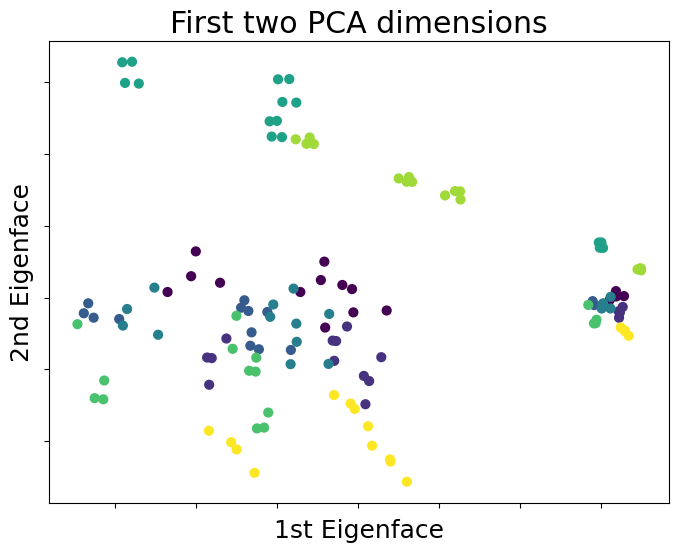

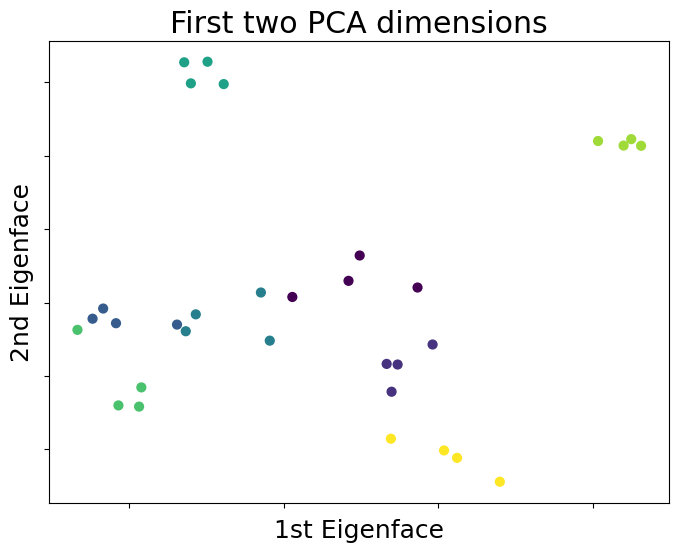

In [ ]:
from random import randint
import plotly.graph_objects as go
import numpy as np

new_datos = np.dot(U[:,0:3].T, X).T
color = np.ndarray.flatten(np.array([[i]*16 for i in range(8)]))

fig = go.Figure(data=[go.Scatter3d(x=new_datos[:,0], y=new_datos[:,1], z=new_datos[:,2], mode='markers', marker=dict(size=5, color=color, colorscale='Viridis'))])
fig.update_layout(title='Gráfico de Dispersión 3D Interactivo',
                  scene=dict(
                      xaxis_title='1st Eigenface',
                      yaxis_title='2nd Eigenface',
                      zaxis_title='3rd Eigenface'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

fig.show()
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

# Hacer el gráfico de dispersión
scatter = ax.scatter(
    new_datos[:, 0],
    new_datos[:, 1],
    c=color,
    s=40,
)

ax.set_title("First two PCA dimensions")
ax.set_xlabel("1st Eigenface")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenface")
ax.yaxis.set_ticklabels([])

plt.show()

original_faces = []
color = np.ndarray.flatten(np.array([[i]*4 for i in range(8)]))

for i in range(8):
  for j in range(4):
    original_faces.append(new_datos[(i*16)+j,:])

original_faces = np.array(original_faces)

fig = go.Figure(data=[go.Scatter3d(x=original_faces[:,0], y=original_faces[:,1], z=original_faces[:,2], mode='markers', marker=dict(size=5, color=color, colorscale='Viridis'))])
fig.update_layout(title='Gráfico de Dispersión 3D Interactivo',
                  scene=dict(
                      xaxis_title='1st Eigenface',
                      yaxis_title='2nd Eigenface',
                      zaxis_title='3rd Eigenface'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

# Hacer el gráfico de dispersión
scatter = ax.scatter(
    original_faces[:, 0],
    original_faces[:, 1],
    c=color,
    s=40,
)

ax.set_title("First two PCA dimensions")
ax.set_xlabel("1st Eigenface")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenface")
ax.yaxis.set_ticklabels([])

plt.show()

## En 3D

In [ ]:
import numpy as np

def norma(x, y, p=2):
  """
  Función que calcula la norma p entre dos vectores (la norma infinito no esta
  del todo configurada)
  Entradas: -p: norma a calcular
            -x: vector numero 1
            -y: vector numero 2
  Salidas: -ans: valor de la norma p entre los dos puntos
  """
  ans = 0
  for i in range(len(x)):
    ans += (abs(x[i]-y[i]))**p
  return ans**(1/p)

for i in range(textFaces.shape[1]):
  contador = [0 for _ in range(8)] #Lista para saber cual vecino es mayor
  cant = 0
  veci_mayor = 0
  testFaceMS = testFace - avgFace
  testFaceMS = np.dot(U[:,0:3].T, testFaceMS).T
  usados = {}

  for _ in range(4):
    mayor_temp = 2**32
    veci_temp = 0
    iterador = 0
    for j in range(original_faces.shape[0]):
      if j in usados: continue
      t = norma(original_faces[j,:], testFaceMS)
      if t < mayor_temp:
        iterador = j
        veci_temp = j//4
        mayor_temp = t
    contador[veci_temp] += 1
    usados[iterador] = True
    if contador[veci_temp] > cant:
      cant = contador[veci_temp]
      veci_mayor = veci_temp


  fig = go.Figure(data=[go.Scatter3d(x=original_faces[:,0], y=original_faces[:,1], z=original_faces[:,2], mode='markers', marker=dict(size=5, color=color, colorscale='Viridis'))])
  # Añadir los puntos importantes
  fig.add_trace(go.Scatter3d(
      x=[testFaceMS[0]], y=[testFaceMS[1]], z=[testFaceMS[2]],
      mode='markers+text',
      marker=dict(size=10, color='red'),
      textposition='top center',
      name='Puntos Importantes'
  ))

  # Personalizar el diseño
  fig.update_layout(title='Gráfico de Dispersión 3D Interactivo',
                  scene=dict(
                      xaxis_title='1st Eigenface',
                      yaxis_title='2nd Eigenface',
                      zaxis_title='3rd Eigenface'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

  # Mostrar el gráfico
  fig.show()

  print(f"La persona ingresada tiene mas parecido a la persona {veci_mayor+1}")

La persona ingresada tiene mas parecido a la persona 2


## En 2D

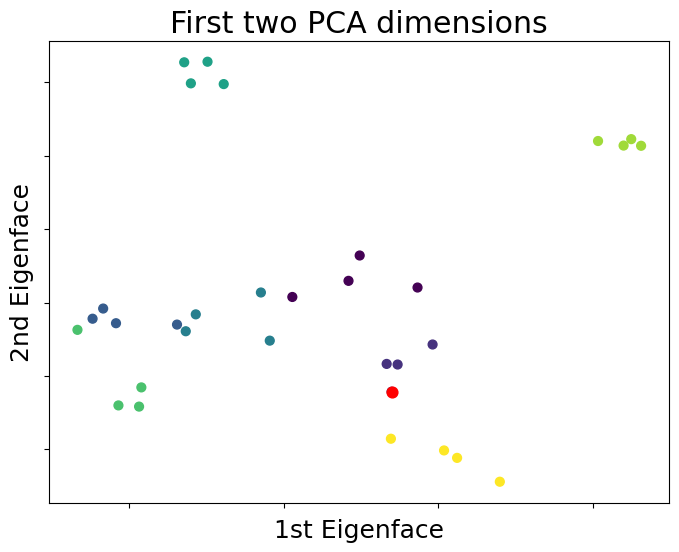

La persona ingresada tiene mas parecido a la persona 2


In [ ]:
import numpy as np

for i in range(textFaces.shape[1]):
  contador = [0 for _ in range(8)] #Lista para saber cual vecino es mayor
  cant = 0
  veci_mayor = 0
  testFaceMS = testFace - avgFace
  testFaceMS = np.dot(U[:,0:2].T, testFaceMS).T
  usados = {}
  for _ in range(4):
    mayor_temp = 2**32
    veci_temp = 0
    iterador = 0
    for j in range(original_faces.shape[0]):
      if j in usados: continue
      t = norma(original_faces[j,:2], testFaceMS)
      if t < mayor_temp:
        iterador = j
        veci_temp = j//4
        mayor_temp = t
    contador[veci_temp] += 1
    usados[iterador] = True

    if contador[veci_temp] > cant:
      cant = contador[veci_temp]
      veci_mayor = veci_temp
  fig.show()
  fig = plt.figure(1, figsize=(8, 6))
  ax = fig.add_subplot(111)

  # Hacer el gráfico de dispersión
  ax.scatter(
      original_faces[:, 0],
      original_faces[:, 1],
      c=color,
      s=40,
  )

  ax.scatter(
      testFaceMS[0],
      testFaceMS[1],
      c="red",
      s=60,
  )

  ax.set_title("First two PCA dimensions")
  ax.set_xlabel("1st Eigenface")
  ax.xaxis.set_ticklabels([])
  ax.set_ylabel("2nd Eigenface")
  ax.yaxis.set_ticklabels([])

  plt.show()
  print(f"La persona ingresada tiene mas parecido a la persona {veci_mayor+1}")